In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
named_tpms = pd.read_hdf("../data/processed/tpm_matrix_named.hdf",key="named_tpms")

In [16]:
experiments = ['LNCaP_GFP_1',
 'LNCaP_GFP_2',
 'LNCaP_GFP_3',
 'LNCaP_RPL22_1',
 'LNCaP_RPL22_2',
 'LNCaP_RPL22_3',
 'CAL851_GFP_1',
 'CAL851_GFP_2',
 'CAL851_GFP_3',
 'CAL851_RPL22L1_1',
 'CAL851_RPL22L1_2',
 'CAL851_RPL22L1_3',
 'LNCaP_shLuc_1',
 'LNCaP_shLuc_2',
 'LNCaP_shLuc_3',
 'LNCaP_sh704_1',
 'LNCaP_sh704_2',
 'LNCaP_sh704_3',
 'LNCaP_sh705_1',
 'LNCaP_sh705_2',
 'LNCaP_sh705_3']

In [4]:
rpl22_oe = pd.read_hdf("../data/intermediate/kallisto_sleuth/RPL22_oe.hdf", key="rpl22_oe")
rpl22l1_oe = pd.read_hdf("../data/intermediate/kallisto_sleuth/RPL22L1_oe.hdf", key="rpl22l1_oe")
sh704 = pd.read_hdf("../data/intermediate/kallisto_sleuth/sh704.hdf", key="sh704")
sh705 = pd.read_hdf("../data/intermediate/kallisto_sleuth/sh705.hdf", key="sh705")

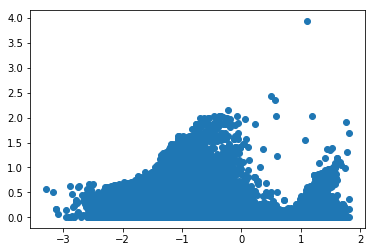

In [10]:
plt.scatter(np.log10(rpl22_oe["rss"]),-np.log10(rpl22_oe["qval"]))

In [5]:
def plot_tpm_dist(gene_id):
    
    select_abundance = np.array(gene_tpms[gene_id])

    expression_df = pd.DataFrame()

    expression_df["Gene TPM"] = list(select_abundance[[0, 1, 2, 6, 7, 8, 12, 13, 14, 12, 13, 14]]) + list(
        select_abundance[[3, 4, 5, 9, 10, 11, 15, 16, 17, 18, 19, 20]])

    expression_df["treatment"] = ["Control"]*12 + ["Treatment"]*12

    expression_df["Experiment"] = (
        ["RPL22++"]*3 + ["RPL22L1++"]*3 + ["sh704"]*3 + ["sh705"]*3)*2

    expression_df.index = list(gene_tpms.index[[0, 1, 2, 6, 7, 8, 12, 13, 14, 12, 13, 14]]) + list(
        gene_tpms.index[[3, 4, 5, 9, 10, 11, 15, 16, 17, 18, 19, 20]])
    
    plt.figure(figsize=(4, 2.5))

    sns.barplot(x="Experiment",
                y="Gene TPM",
                data=expression_df,
                hue="treatment",
                palette={"Control": "#e3e3e3", "Treatment": "#286DC0"},
                ci=None)

    ax = sns.stripplot(x="Experiment",
                       y="Gene TPM",
                       data=expression_df,
                       hue="treatment",
                       dodge=True,
                       palette={"Control": "#e3e3e3", "Treatment": "#286DC0"},
                       size=8,
                       jitter=False,
                       linewidth=2,
                       edgecolor="black",
                       alpha=0.75
                      )

    ax.get_legend().remove()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.ylim(0)
    
    plt.title(gene_id.split("_")[0])
    
    plt.savefig("../plots/"+gene_id+"_expression_distribution.pdf",bbox_inches="tight")


,target_id,pval,qval,test_stat,rss,degrees_free,mean_obs,var_obs,tech_var,sigma_sq,smooth_sigma_sq,final_sigma_sq,format_transcript_id
ENST00000471204.5,1,1.877825e-09,0.000115,36.096513,12.594414,1.0,8.072771,2.518883,0.003695,2.515188,0.006531,2.515188,RPL22_ENST00000471204.5
ENST00000234875.9,2,1.210131e-07,0.003697,28.004828,3.123811,1.0,8.793426,0.624762,0.000280,0.624483,0.009104,0.624483,RPL22_ENST00000234875.9
ENST00000295830.13,3,2.131862e-07,0.004342,26.909701,3.657392,1.0,5.508258,0.731478,0.006701,0.724777,0.009148,0.724777,RPL22L1_ENST00000295830.13
ENST00000252444.9,4,4.569209e-07,0.006979,25.437618,0.596817,1.0,8.415739,0.119363,0.000637,0.118726,0.007484,0.118726,LDLR_ENST00000252444.9
ENST00000536410.6,5,1.631579e-06,0.009191,22.986325,0.342527,1.0,7.509118,0.068505,0.000694,0.067811,0.005743,0.067811,DHRS7_ENST00000536410.6
ENST00000375078.4,6,8.177139e-07,0.009191,24.315664,0.416878,1.0,7.287693,0.083376,0.000762,0.082614,0.005650,0.082614,CAMK2N1_ENST00000375078.4
ENST00000494914.1,7,1.433208e-06,0.009191,23.235583,0.859594,1.0,6.397130,0.171919,0.002138,0.169781,0.006401,0.169781,DDC_ENST00000494914.1
ENST00000463836.1,8,1.373430e-06,0.009191,23.317523,3.917787,1.0,6.063296,0.783557,0.008408,0.775149,0.007171,0.775149,RPL22L1_ENST00000463836.1
ENST00000265896.10,9,1.654611e-06,0.009191,22.959377,0.438307,1.0,8.417237,0.087661,0.000228,0.087433,0.007489,0.087433,SQLE_ENST00000265896.10
ENST00000467076.5,10,1.192288e-06,0.009191,23.589622,0.462722,1.0,8.242870,0.092544,0.001864,0.090681,0.006951,0.090681,FDPS_ENST00000467076.5
